In [1]:
import pandas as pd
import numpy as np
import mglearn
import graphviz
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
cancer = load_breast_cancer()

In [3]:
x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                test_size=0.3,
                                                random_state=0)
#데이터 분할
#테스트 사이즈의 기본값은 0.25지만 0.3을 줌

In [4]:
mlp = MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
#모델 선정 및 학습

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [5]:
print('훈련세트 정확도:{:.2f}'.format(mlp.score(x_train,y_train)))
print('테스트 세트 정확도:{:.2f}'.format(mlp.score(x_test,y_test)))
#분류모델이므로 model.score()의 기준은 Accuracy(정확도)

훈련세트 정확도:0.93
테스트 세트 정확도:0.95


- 인공신경망은 평균이 0, 분산이 1이 되도록 변형해 주는것이 좋음(Standard)
- 이 조건에 맞도록 데이터의 스케일을 조정해보자.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
#스케일러 불러오기
scaler = StandardScaler()
#스케일러 학습
scaler.fit(x_train)
#데이터 스케일 변환
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

- fit_transform 함수 사용시
- scaler = StandardScaler()
- x_train_scaled = scaler.fit_transform(x_train)
- x_test_scaled = scaler.transfrom(x_test)

In [8]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled,y_train)
#모델 선정 및 학습

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [9]:
print('훈련세트 정확도:{:.3f}'.format(mlp.score(x_train_scaled,y_train)))
print('테스트 세트 정확도:{:.3f}'.format(mlp.score(x_test_scaled,y_test)))
#분류모델이므로 model.score()의 기준은 Accuracy(정확도)

훈련세트 정확도:0.990
테스트 세트 정확도:0.971


#### Stochastic Optimizer: Maximum iteration(200) reached and the optimization hasn't converged yet
- 위 오류가 나오는 이유는 주어진 반복양이 적어서 다 반복을 돌려도 학습이 원활하게 되지 않았기 때문 

In [10]:
mlp = MLPClassifier(random_state=0,max_iter=3000)
mlp.fit(x_train_scaled,y_train)
#모델 선정, 모델학습

MLPClassifier(max_iter=3000, random_state=0)

In [11]:
print('훈련세트 정확도:{:.3f}'.format(mlp.score(x_train_scaled,y_train)))
print('테스트 세트 정확도:{:.3f}'.format(mlp.score(x_test_scaled,y_test)))
#분류모델이므로 model.score()의 기준은 Accuracy(정확도)

훈련세트 정확도:0.995
테스트 세트 정확도:0.977


In [12]:
mlp = MLPClassifier(random_state=0,max_iter=1000,alpha=1)
mlp.fit(x_train_scaled,y_train)
#모델 선정, 모델학습

MLPClassifier(alpha=1, max_iter=1000, random_state=0)

In [13]:
print('훈련세트 정확도:{:.3f}'.format(mlp.score(x_train_scaled,y_train)))
print('테스트 세트 정확도:{:.3f}'.format(mlp.score(x_test_scaled,y_test)))
#분류모델이므로 model.score()의 기준은 Accuracy(정확도)

훈련세트 정확도:0.990
테스트 세트 정확도:0.971


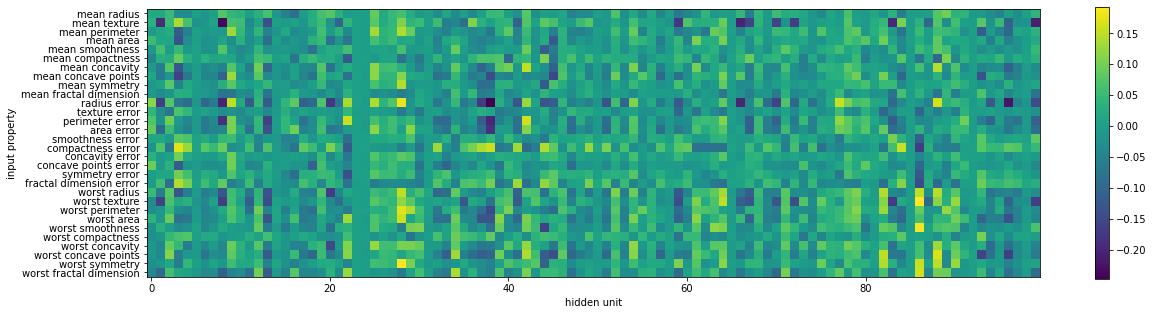

In [14]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation="none", cmap="viridis")
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('hidden unit')
plt.ylabel('input property')
plt.colorbar()
plt.show()

- 모델의 가중치를 확인해보면 어떤 특성이 학습되었는지 알 수 있음.
- 입력층과 은닉층 사이에 위치한 학습된 가중치를 보여줌
- 지금 그래프는 행은 30개 입력특성(feature)는 100개의 은닉유닛에 해당함
- 이 그래프에서 밝은 색은 높은 값, 어두운 색은 음수나 낮은값을 나타냄

- 어두운 색들 : 특성들은 덜 중요하거나 신경망에 적절하게 입력이 되지 않았을 수도 있다.